In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
cardio_data = pd.read_csv('Cardiotocographic.csv')

In [5]:
cardio_data.head(20)

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
0,120,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,73,0.5,43,2.4,64,62,126,2
1,132,0.006380,0.000000,0.006380,0.003190,0.0,0.000000,17,2.1,0,10.4,130,68,198,1
2,133,0.003322,0.000000,0.008306,0.003322,0.0,0.000000,16,2.1,0,13.4,130,68,198,1
3,134,0.002561,0.000000,0.007682,0.002561,0.0,0.000000,16,2.4,0,23.0,117,53,170,1
4,132,0.006515,0.000000,0.008143,0.000000,0.0,0.000000,16,2.4,0,19.9,117,53,170,1
5,134,0.001049,0.000000,0.010493,0.009444,0.0,0.002099,26,5.9,0,0.0,150,50,200,3
6,134,0.001403,0.000000,0.012623,0.008415,0.0,0.002805,29,6.3,0,0.0,150,50,200,3
7,122,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,83,0.5,6,15.6,68,62,130,3
8,122,0.000000,0.000000,0.001517,0.000000,0.0,0.000000,84,0.5,5,13.6,68,62,130,3
9,122,0.000000,0.000000,0.002967,0.000000,0.0,0.000000,86,0.3,6,10.6,68,62,130,3


In [6]:
cardio_data.describe()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,3.000000


In [7]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BPM     2126 non-null   int64  
 1   APC     2126 non-null   float64
 2   FMPS    2126 non-null   float64
 3   UCPS    2126 non-null   float64
 4   DLPS    2126 non-null   float64
 5   SDPS    2126 non-null   float64
 6   PDPS    2126 non-null   float64
 7   ASTV    2126 non-null   int64  
 8   MSTV    2126 non-null   float64
 9   ALTV    2126 non-null   int64  
 10  MLTV    2126 non-null   float64
 11  Width   2126 non-null   int64  
 12  Min     2126 non-null   int64  
 13  Max     2126 non-null   int64  
 14  NSP     2126 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 249.3 KB


In [8]:
cardio_data.shape

(2126, 15)

In [9]:
cardio_data['NSP'].value_counts()

,count
NSP,
1,1655
2,295
3,176


<Axes: xlabel='NSP', ylabel='count'>

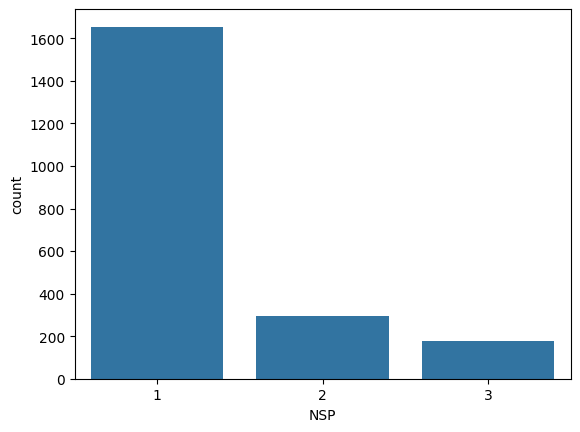

In [10]:
sns.countplot(cardio_data, x="NSP")

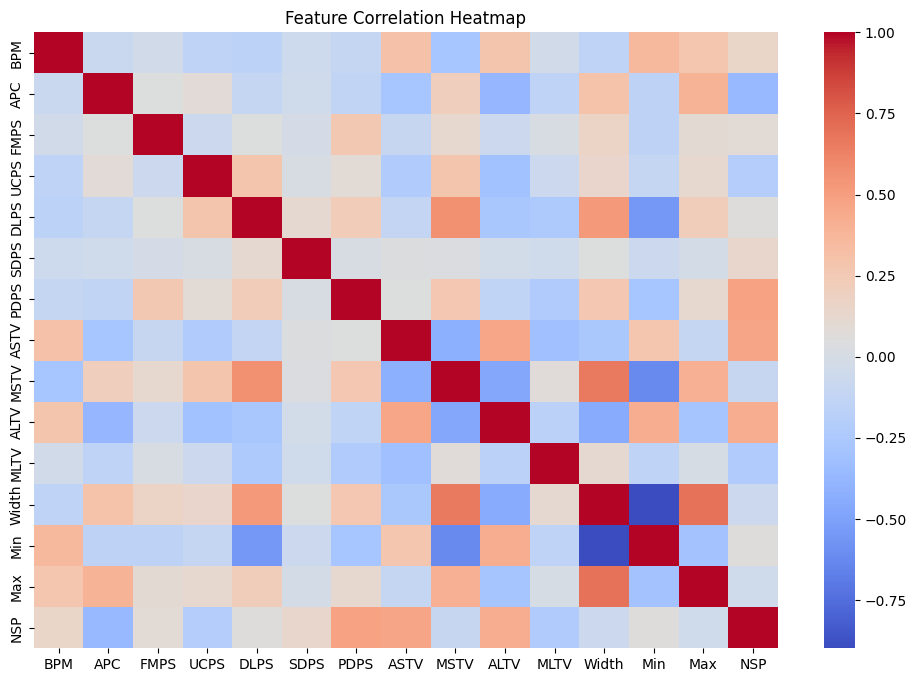

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(cardio_data.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


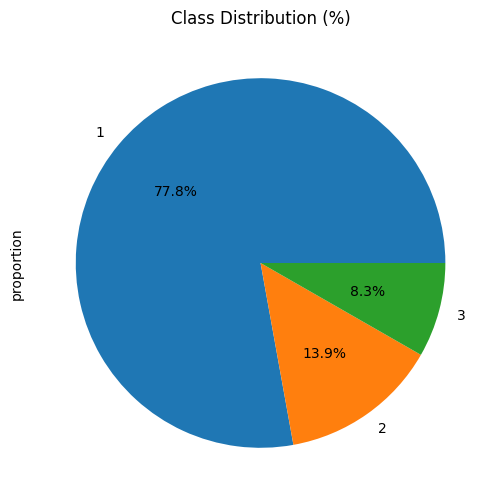

In [57]:
cardio_data['NSP'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Class Distribution (%)")
plt.show()


/tmp/ipython-input-2668180625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cardio_data, x='NSP', y='BPM', palette='Set2')


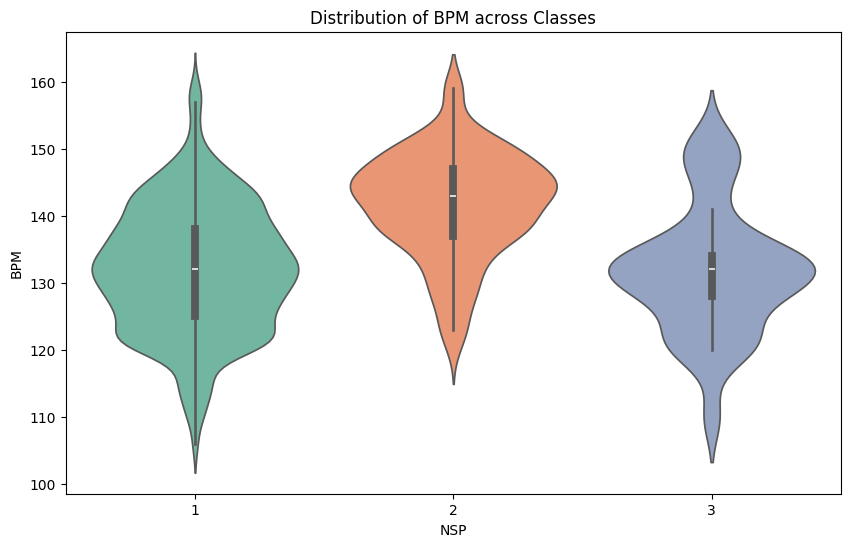

In [60]:
# BPM distribution across NSP
plt.figure(figsize=(10,6))
sns.violinplot(data=cardio_data, x='NSP', y='BPM', palette='Set2')
plt.title("Distribution of BPM across Classes")
plt.show()

/tmp/ipython-input-4011337421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cardio_data, x='NSP', y='ASTV', palette='Set3')


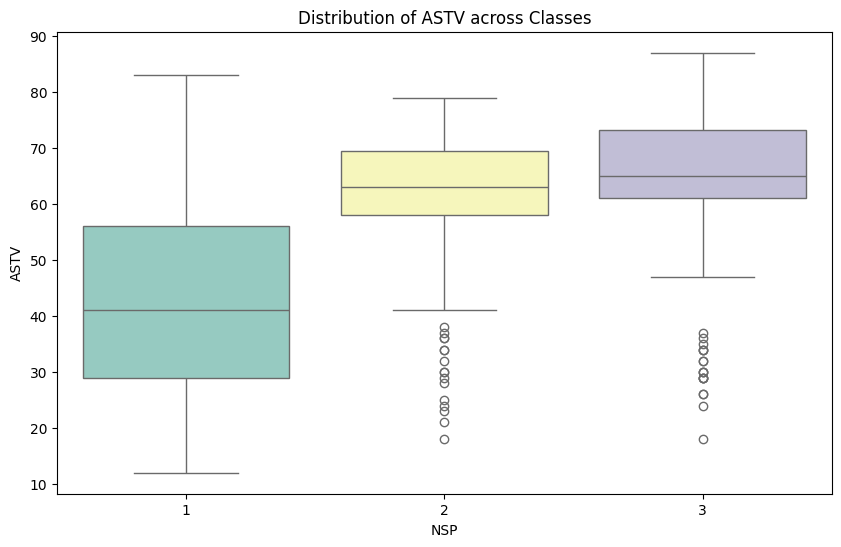

In [61]:
# ASTV distribution across NSP
plt.figure(figsize=(10,6))
sns.boxplot(data=cardio_data, x='NSP', y='ASTV', palette='Set3')
plt.title("Distribution of ASTV across Classes")
plt.show()


/tmp/ipython-input-548280283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cardio_data, x='NSP', y='MSTV', palette='coolwarm')


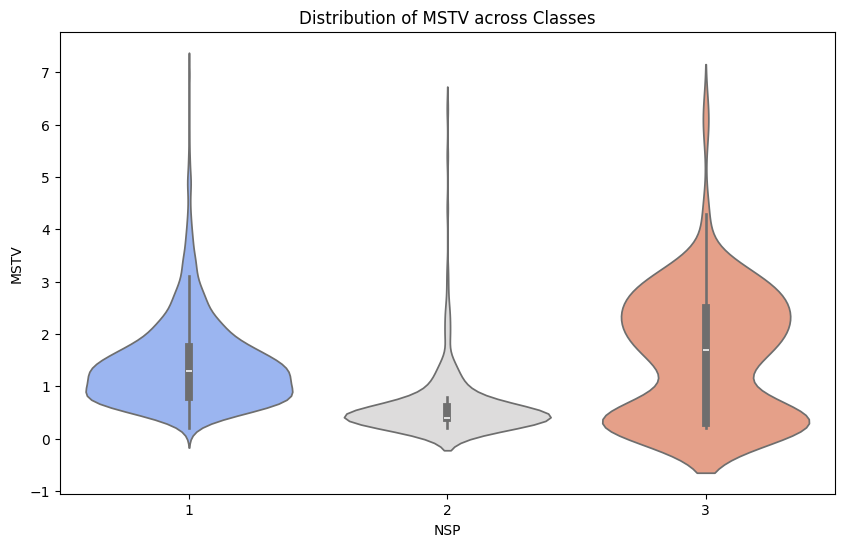

In [62]:
# MSTV distribution across NSP
plt.figure(figsize=(10,6))
sns.violinplot(data=cardio_data, x='NSP', y='MSTV', palette='coolwarm')
plt.title("Distribution of MSTV across Classes")
plt.show()

/tmp/ipython-input-1561121310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cardio_data, x='NSP', y='Max', palette='pastel')


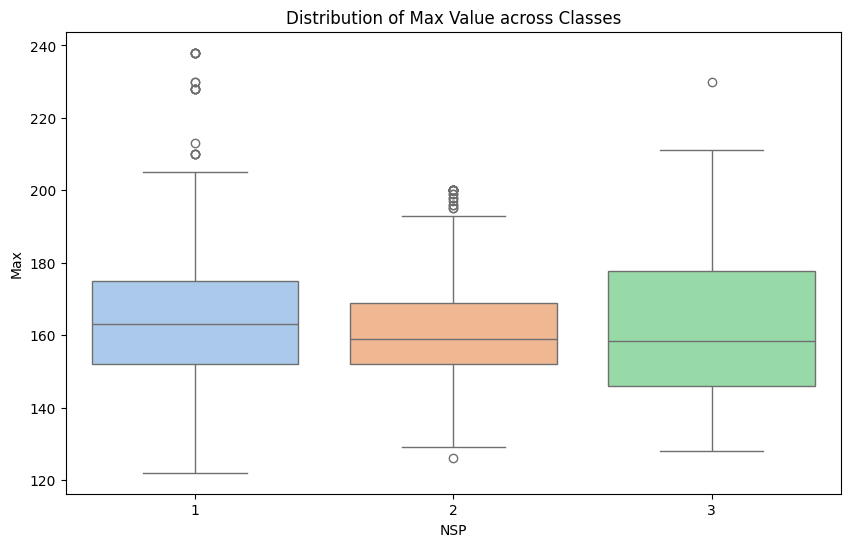

In [63]:
# Max distribution across NSP
plt.figure(figsize=(10,6))
sns.boxplot(data=cardio_data, x='NSP', y='Max', palette='pastel')
plt.title("Distribution of Max Value across Classes")
plt.show()

In [13]:
X = cardio_data.drop('NSP',axis=1)
y = cardio_data['NSP'] -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.2, stratify=y, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
model = tf.keras.models.Sequential()

In [46]:
model.add(tf.keras.layers.Dense(15,activation='relu',input_shape=(14,)))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
class_weights = {
    0: 1,
    1: 5.6,
    2: 9.4
}
history = model.fit(
    X_train,
    np.asarray(y_train),
    batch_size=32,
    epochs=200,
    verbose=2,
    class_weight=class_weights,
    validation_split=0.2
)

Epoch 1/200
43/43 - 4s - 101ms/step - accuracy: 0.1228 - loss: 5.1887 - val_accuracy: 0.7706 - val_loss: 1.9357
Epoch 2/200
43/43 - 2s - 45ms/step - accuracy: 0.8316 - loss: 4.6530 - val_accuracy: 0.8382 - val_loss: 1.6729
Epoch 3/200
43/43 - 0s - 8ms/step - accuracy: 0.8449 - loss: 4.0813 - val_accuracy: 0.8706 - val_loss: 1.3804
Epoch 4/200
43/43 - 0s - 6ms/step - accuracy: 0.9051 - loss: 3.4447 - val_accuracy: 0.8912 - val_loss: 1.0910
Epoch 5/200
43/43 - 0s - 6ms/step - accuracy: 0.9110 - loss: 2.7842 - val_accuracy: 0.8824 - val_loss: 0.8377
Epoch 6/200
43/43 - 0s - 8ms/step - accuracy: 0.9022 - loss: 2.1878 - val_accuracy: 0.8765 - val_loss: 0.6661
Epoch 7/200
43/43 - 0s - 7ms/step - accuracy: 0.8934 - loss: 1.7263 - val_accuracy: 0.8618 - val_loss: 0.5620
Epoch 8/200
43/43 - 0s - 9ms/step - accuracy: 0.8853 - loss: 1.3926 - val_accuracy: 0.8588 - val_loss: 0.4935
Epoch 9/200
43/43 - 0s - 5ms/step - accuracy: 0.8743 - loss: 1.1562 - val_accuracy: 0.8529 - val_loss: 0.4522
Epoch 1

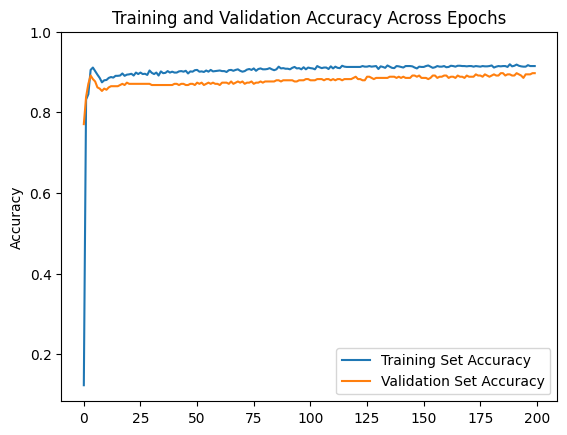

In [50]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()


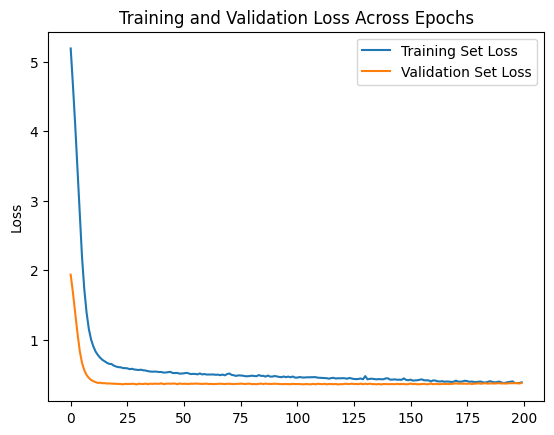

In [51]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.legend()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


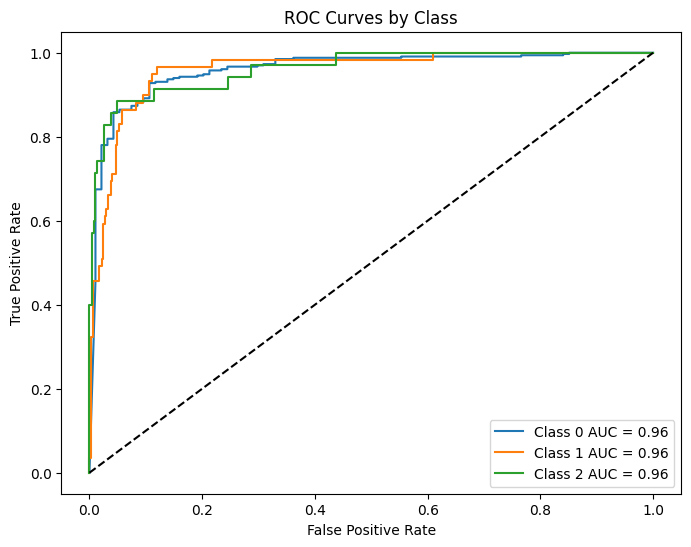

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_pred_prob = model.predict(X_test)

plt.figure(figsize=(8,6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_pred_prob[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves by Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


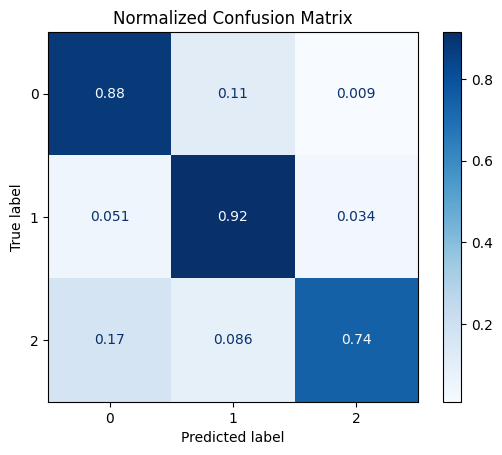

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.show()


In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


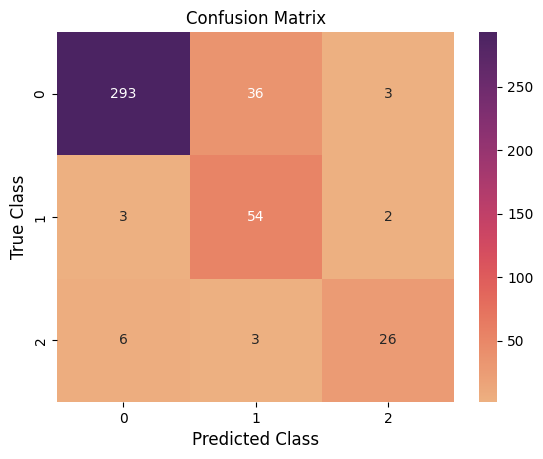

In [54]:
# Use the confusion_matrix function to generate and visualize a confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(confusion_matrix,
                 cmap='flare',
                 annot=True,
                 fmt='d')

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       332
           1       0.58      0.92      0.71        59
           2       0.84      0.74      0.79        35

    accuracy                           0.88       426
   macro avg       0.80      0.85      0.81       426
weighted avg       0.91      0.88      0.88       426



                     Accuracy  F1-score
Logistic Regression  0.901408  0.901167
Random Forest        0.950704  0.950005
Neural Network       0.875587  0.883477


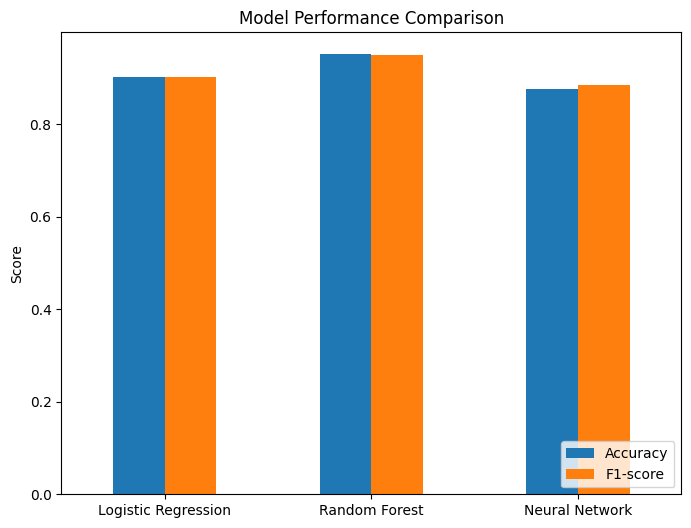

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import shap

# -------------------------
# 1. Benchmark Models
# -------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=0)
}

results = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_clf)
    f1 = f1_score(y_test, y_pred_clf, average="weighted")
    results[name] = {"Accuracy": acc, "F1-score": f1}

# Add NN results for comparison
nn_acc = accuracy_score(y_test, y_pred)
nn_f1 = f1_score(y_test, y_pred, average="weighted")
results["Neural Network"] = {"Accuracy": nn_acc, "F1-score": nn_f1}

# Convert results to DataFrame for plotting
results_df = pd.DataFrame(results).T
print(results_df)

# Bar plot comparison
results_df.plot(kind="bar", figsize=(8,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


/tmp/ipython-input-2959842731.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10], palette="viridis")


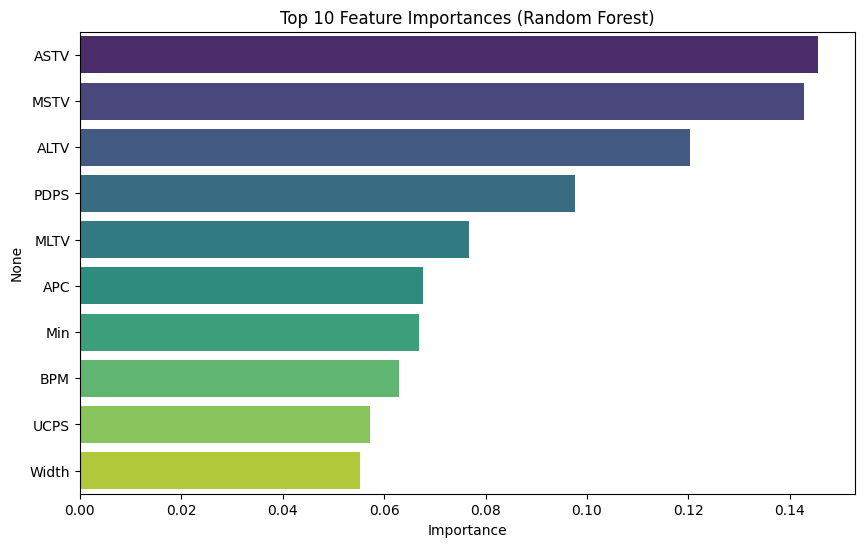

In [68]:
# -------------------------
# 2. Feature Importance (Random Forest)
# -------------------------
importances = models["Random Forest"].feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10], palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

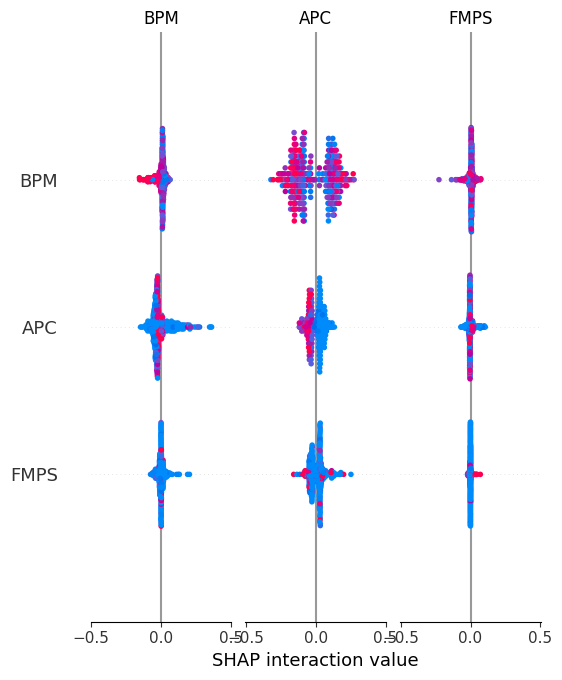

In [70]:
# -------------------------
# 3. SHAP Values (for interpretability)
# -------------------------
explainer = shap.TreeExplainer(models["Random Forest"])
shap_values = explainer.shap_values(X_test)

# Summary plot (all classes combined)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


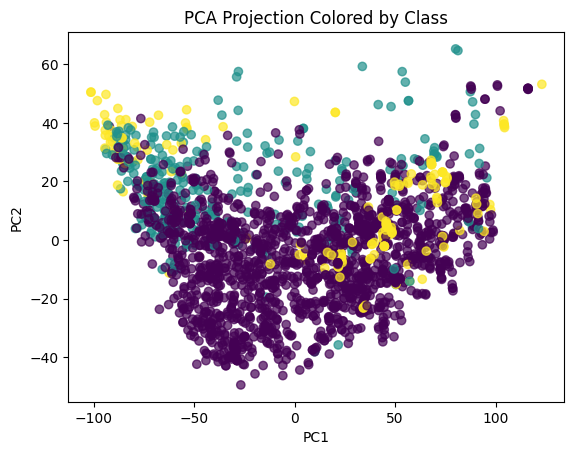

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.7)
plt.title("PCA Projection Colored by Class")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
